## <font color="Blue">Phishing-URL Detection Model using Deep Learning algorithm - ConvXGB </font>

<b>GOAL:</b> This study employs new deep learning algorithm named "ConvXGB" to the field of cybersecurity in detecting phishing URL.</br>
<b>Author :</b> Saravanan Muthuramalingam </br>
<b>Purpose of this notebook :</b> This Notebook handles the following tasks,
    <li> Inferential Statistics </li>
    <li> EXploratory Data Analysis (EDA) </li>


In [4]:
# import all required python libraries
#-------------------------------------#
# Statistics Libraries
import numpy as np

# Dataset related Libraires
import pandas as pd 
import csv

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# URL Parsing Libraries
import urllib.parse
from urllib.parse import urlparse
from urllib.parse import urlsplit
from urlpath import URL

# OS and regular expression Libraries
import re
import glob
import os

# Image processing related Libraries
from PIL import Image
import cv2
#import skimage.measure
#import imghdr

# Image validation related Libraries
#from difPy import dif
#from sklearn.preprocessing import OneHotEncoder



In [5]:
# loading the raw-dataset to pandas dataframe
Phishing_url_df = pd.read_csv('phishing_dataset.csv', encoding='unicode_escape')

In [6]:
#coverting the data type of 'create date' feature
Phishing_url_df['created_date']= pd.to_datetime(Phishing_url_df['created_date'], errors='coerce').dt.strftime('%Y-%m-%d')

#### <font color=blue> 4. Exploratory Data Analysis </font>

 Reading the transformed PNG file, these files carries 3 channels, RGB --> Red, Green and Blue.

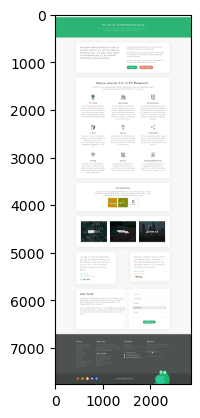

In [7]:
# Viewing the normal image
img_normal = cv2.imread(r"C:\Users\msara\Desktop\dataset\converted_images\1.PNG")
#img_r[:,:,1:2]=0
plt.imshow(img_normal)

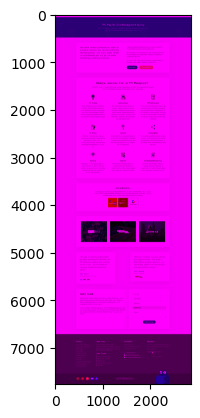

In [8]:
# # Viewing the Image in red by making the other two channel value as null
img_r = cv2.imread(r"C:\Users\msara\Desktop\dataset\converted_images\1.PNG")
img_r[:,:,1:2]=0
plt.imshow(img_r)
plt.show()

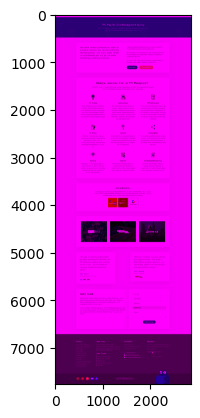

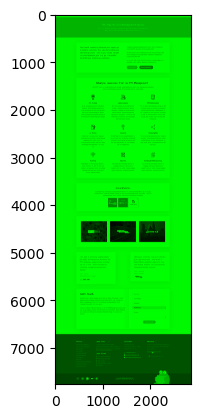

In [12]:
# Viewing the Image in green by making the other two channel value as null
img_g = cv2.imread(r"C:\Users\msara\Desktop\dataset\converted_images\1.PNG")
img_g[:,:,(0,2)]=0
plt.imshow(img_g)

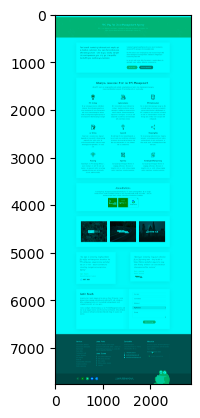

In [55]:
# Viewing the Image in blue by making the other two channel value as null
img_g = cv2.imread(r"C:\Users\msara\Desktop\dataset\converted_images\1.PNG")
img_g[:,:,0:1]=0
plt.imshow(img_g)

In [17]:
#display the validattaion image pixel 
#x= val_image[30]
x = cv2.imread(r"C:\Users\msara\Desktop\dataset\converted_images\1.PNG")
print(" the dimension of x is 2D matrix as" , x.shape)
x = cv2.resize(x, (26, 26))

#plt.imshow(x, cmap='gray')
print(x)

 the dimension of x is 2D matrix as (7762, 2844, 3)
[[[ 44 180 117]
  [ 44 180 117]
  [ 44 180 117]
  ...
  [ 44 180 117]
  [ 44 180 117]
  [ 44 180 117]]

 [[ 44 180 117]
  [ 44 180 117]
  [ 44 180 117]
  ...
  [ 44 180 117]
  [ 44 180 117]
  [ 44 180 117]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 ...

 [[ 77  81  79]
  [ 77  81  79]
  [ 77  81  79]
  ...
  [ 77  81  79]
  [ 77  81  79]
  [ 77  81  79]]

 [[ 77  81  79]
  [ 77  81  79]
  [ 77  81  79]
  ...
  [ 77  81  79]
  [ 77  81  79]
  [ 77  81  79]]

 [[ 63  67  65]
  [ 63  67  65]
  [ 63  67  65]
  ...
  [ 63  67  65]
  [ 63  67  65]
  [ 63  67  65]]]


In [8]:
#Checking for class imbalance in target variable
Phishing_url_df['result'].value_counts()

0    49854
1    29887
Name: result, dtype: int64

<AxesSubplot:>

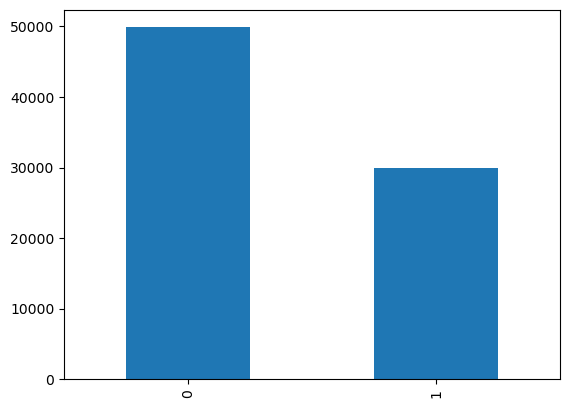

In [9]:
#Checking for class imbalance in target variable and plotting
Phishing_url_df['result'].value_counts().plot.bar()

In [16]:
#value count of feature 'protocol'
Phishing_url_df['protocol'].value_counts()

https    61099
http     18642
Name: protocol, dtype: int64

#### <font color='blue'>3. Inferential Statistics</font>

In [73]:
#functions to derive features "protocol" and "hostname" from feature named "url"

#Function to parse Protocol from the url
def parse_protocol(x):
    parsed_uri = urllib.parse.urlsplit(x)
    result = '{uri.scheme}'.format(uri=parsed_uri)
    return result

#Function to parse Hostname from the url
def parse_hostname(x):
    parsed_uri = urllib.parse.urlsplit(x)
    result = '{uri.hostname}'.format(uri=parsed_uri)
    return result

In [74]:
# Creating new features with help of existing url features
Phishing_url_df['protocol'] = Phishing_url_df['url'].apply(lambda x: parse_protocol(x))
Phishing_url_df['hostname'] = Phishing_url_df['url'].apply(lambda x: parse_hostname(x))

In [66]:
# Removing un-necessary spaces in the rows.
Phishing_url_df['protocol'] = Phishing_url_df['protocol'].str.replace(" ", "")

<AxesSubplot:>

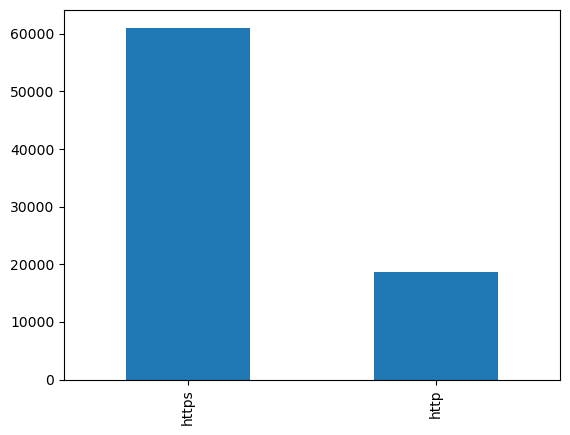

In [17]:
#ploting value count of feature 'protocol'
Phishing_url_df['protocol'].value_counts().plot.bar()

In [18]:
#value count of feature 'hostname'
Phishing_url_df['hostname'].value_counts()

en.wikipedia.org                   1077
www.youtube.com                     385
en-academic.com                     319
www.facebook.com                    288
www.thefreedictionary.com           194
                                   ... 
www.tmztour.com                       1
www.secretflying.com                  1
posts-1184933002.smarttechno.hr       1
www.360totalsecurity.com              1
sqm50.codesandbox.io                  1
Name: hostname, Length: 51091, dtype: int64

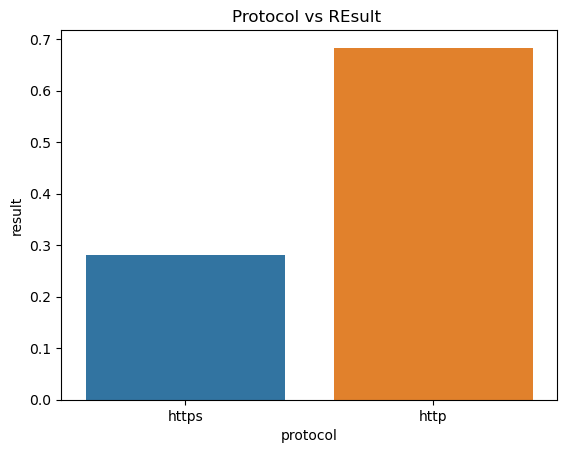

In [39]:
#Ploting result vs protocol features
sns.barplot(y = Phishing_url_df['result'], x=Phishing_url_df['protocol'], ci=None)
plt.title("Protocol vs REsult ")
plt.show()

In [20]:
Phishing_url_df['protocol'].unique()

array(['https', 'http'], dtype=object)

In [40]:
#one hot encoding
dummy1 = pd.get_dummies(Phishing_url_df['protocol'], drop_first=True)

In [41]:
#merging the one hot encoded data
Phishing_df = pd.concat([Phishing_url_df, dummy1], axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

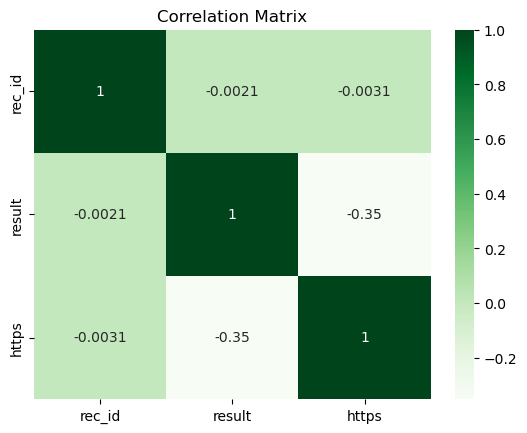

In [42]:
df_corr = Phishing_df.corr()
sns.heatmap(df_corr, cmap='Greens', annot=True)
plt.title("Correlation Matrix")

<font color='orange'>Observation from EDA: </font> The Bar chart confirms that there is a class imbalance found in Mendeley Phishing dataset and correlation matrix reciprocate that the independ variable 'protocol' do have impact on target variable 'result'.

In [27]:
Final_df.shape

(14999, 9)

In [28]:
Final_df.head()

,rec_id,url,website,result,protocol,hostname,Path,File_name,File_name_without_ext
0,1,https://www.screamingfrog.co.uk/pay-per-click/,1635703174277606.html,0,https,www.screamingfrog.co.uk,C:\Users\msara\Desktop\dataset\converted_image...,1.PNG,1
1,6,https://www.newcivilengineer.com/,162314783573698.html,0,https,www.newcivilengineer.com,C:\Users\msara\Desktop\dataset\converted_image...,6.PNG,6
2,10,https://www.ticketmaster.com.au/adelaide-ticke...,1635707612573897.html,0,https,www.ticketmaster.com.au,C:\Users\msara\Desktop\dataset\converted_image...,10.PNG,10
3,11,https://commons.wikimedia.org/wiki/Category:Ga...,1635700926348099.html,0,https,commons.wikimedia.org,C:\Users\msara\Desktop\dataset\converted_image...,11.PNG,11
4,12,https://systematicreviewsjournal.biomedcentral...,1613555572947897.html,0,https,systematicreviewsjournal.biomedcentral.com,C:\Users\msara\Desktop\dataset\converted_image...,12.PNG,12


<AxesSubplot:>

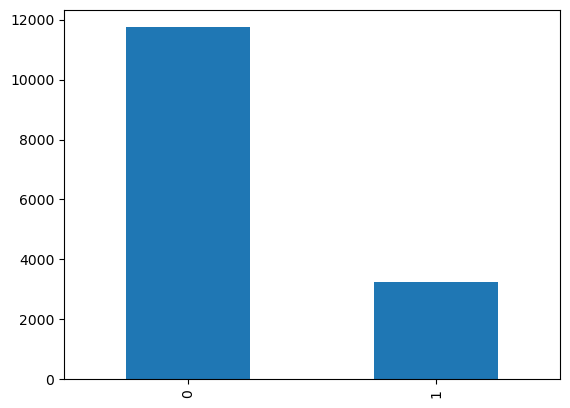

In [29]:
#EDA - checking class imbalance
Final_df['result'].value_counts().plot.bar()

#creating correlation map for the new dataframe
eda_df_corr = eda_df.corr()

#ploting the correlation map in heatmap graph
sns.heatmap(eda_df.corr(),cmap="Greens",annot=True)

In [2]:
#Histogram

In [25]:
Phishing_url_df['created_date'] = pd.to_datetime(Phishing_url_df['created_date'])

In [26]:
Phishing_url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79741 entries, 0 to 79740
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rec_id        79741 non-null  int64         
 1   url           79741 non-null  object        
 2   website       79741 non-null  object        
 3   result        79741 non-null  int64         
 4   created_date  79740 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [75]:
Phishing_url_df.sample(5)

,rec_id,url,website,result,created_date,protocol,hostname
45260,45261,https://confirm-mynewpayees.com/Login.php,1608739645879539.html,1,2020-12-23 21:37:25,,None
8907,8908,https://us.coca-cola.com/,1635746192038083.html,0,2021-11-01 11:26:32,,None
62039,62040,https://mvexchangeforum.com/members-area/login/,1613565040430146.html,0,2021-02-17 18:00:40,,None
72084,72085,https://www.designingbuildings.co.uk/wiki/Sel...,1635703605275131.html,0,2021-10-31 18:06:45,,None
53315,53316,http://venturegroupit.com/vankeowin.com/40553...,1613572796138427.html,1,2021-02-17 20:09:56,,None


<function matplotlib.pyplot.show(close=None, block=None)>

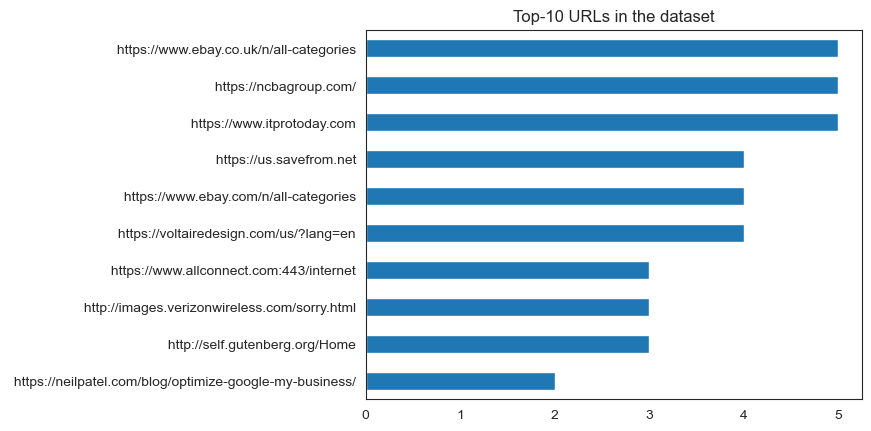

In [61]:
#Ploting top 5 URL in the dataset
Phishing_url_df['url'].value_counts().head(10).sort_values().plot.barh()
#sns.distplot(other_category['category_list'].value_counts().head(5))
plt.title("Top-10 URLs in the dataset")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

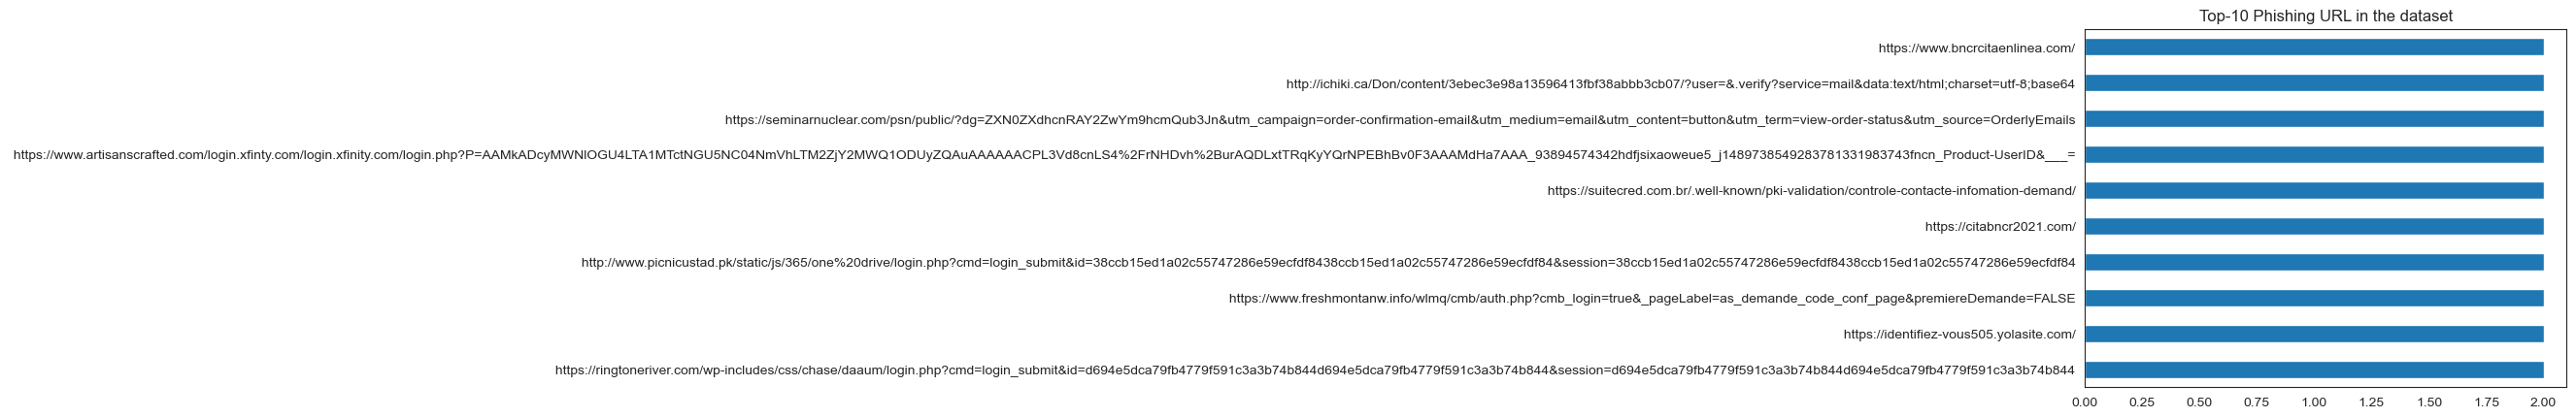

In [124]:
top_5_phishing_url['hostname'].value_counts().head(10)

agitated-darwin.192-3-199-131.plesk.page/orange/?return_url=https:     22
xenodochial-cerf.192-3-199-131.plesk.page/orange/?return_url=https:    14
accounts.google.com/ServiceLogin?passive=1209600&continue=https:        8
toutxsavoir.cloudaccess.host                                            3
18.207.110.64/chaseonline/banking/secured/login.php?https:              3
abtloman.com/store.ebay.de/?ws/eBayISAPI.dll?SignIn&ru=https:           3
yarlstudio.com/attRR/adfs/index.html                                    2
www.securedlloyd-bank.com/                                              2
activaciondeproducto.com/                                               2
mesnatalinoseuspontosemdobro.club/                                      2
Name: hostname, dtype: int64

In [131]:
# Creating new features with help of existing url features
Phishing_url_df['protocol'] = Phishing_url_df['url'].apply(lambda x: x.split(':')[0])
Phishing_url_df['hostname'] = Phishing_url_df['url'].apply(lambda x: x.split('//')[1])


In [132]:
Phishing_url_df['hostname'] = Phishing_url_df['hostname'].apply(lambda x: x.split('/')[0])
Phishing_url_df


,rec_id,url,website,result,created_date,protocol,hostname
0,1,https://www.screamingfrog.co.uk/pay-per-click/,1635703174277606.html,0,2021-10-31 17:59:34,https,www.screamingfrog.co.uk
1,2,https://sms-labanquepostale-sms-labanqueposta...,1613573052480813.html,1,2021-02-17 20:14:12,https,sms-labanquepostale-sms-labanquepostalebiz.com
2,3,http://mrsbt213.yolasite.com/,1607095600394378.html,1,2020-12-04 20:56:40,http,mrsbt213.yolasite.com
3,4,http://234.50.198.35.bc.googleusercontent.com...,1620759901211522.html,1,2021-05-12 00:35:01,http,234.50.198.35.bc.googleusercontent.com
4,5,https://3-138-183-243.cprapid.com/secureNetfl...,1626464266508342.html,1,2021-07-16 19:37:46,https,3-138-183-243.cprapid.com
...,...,...,...,...,...,...,...
79736,79737,https://bestjobmanage.com/adminservicedesk/True/,1622125898152592.html,1,2021-05-27 14:31:38,https,bestjobmanage.com
79737,79738,http://vieuxshack.com/download/adobe/b51f1807...,160822961118687.html,1,2020-12-17 23:56:51,http,vieuxshack.com
79738,79739,https://www.tumblr.com/search/gas%20mask%20ta...,163570726902772.html,0,2021-10-31 19:07:49,https,www.tumblr.com
79739,79740,https://www.magnetic-shield.com/pdf/wc_4.pdf,1635701992217159.html,0,2021-10-31 17:39:52,https,www.magnetic-shield.com


<function matplotlib.pyplot.show(close=None, block=None)>

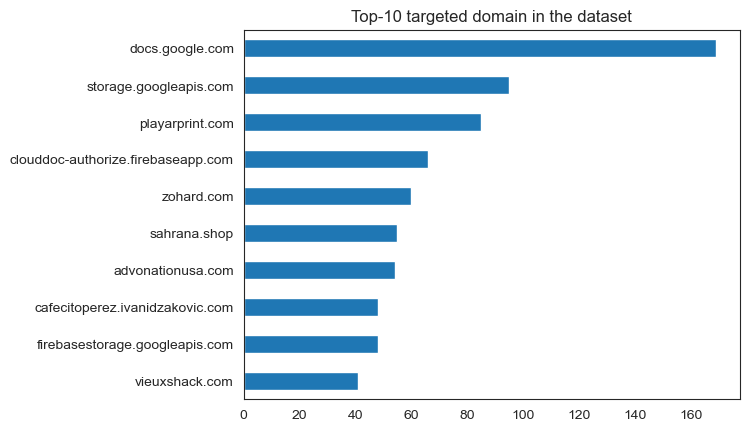

In [134]:
#Plotting top-10 Phishing URL domains
top_5_phishing_url = Phishing_url_df[Phishing_url_df['result'] == 1]
top_5_phishing_url['hostname'].value_counts().head(10).sort_values().plot.barh()
plt.title("Top-10 targeted domain in the dataset")
plt.show

In [26]:
#Function to return image size

directories = {'Class_0': 'C:\\Users\\msara\\Desktop\\dataset\\converted_images\\'}
def get_dims(file):
#'''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

In [27]:
from dask.callbacks import Callback
from tqdm.auto import tqdm

class ProgressBar(Callback):
    def __init__(self, desc=""):
        self.desc = desc

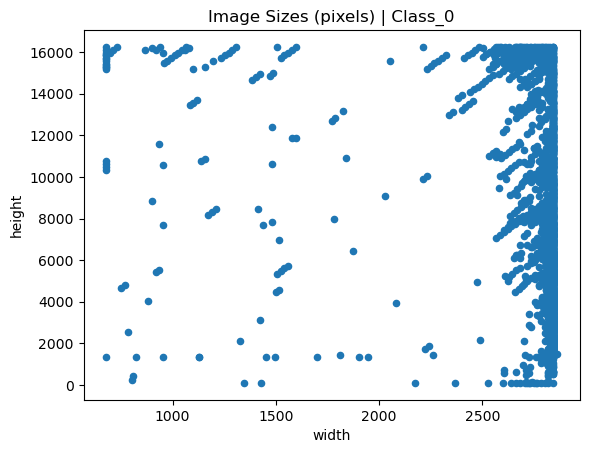

In [28]:
#ploting image size - pixels
import sys
import dask.bag as db
import dask
for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = db.from_sequence(filelist).map(get_dims)
    with ProgressBar():
         dims = dims.compute()
         dim_df = pd.DataFrame(dims, columns=['height', 'width'])
         sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
         sizes.plot.scatter(x='width', y='height');
         plt.title('Image Sizes (pixels)')

array([[<AxesSubplot:title={'center':'result'}>]], dtype=object)

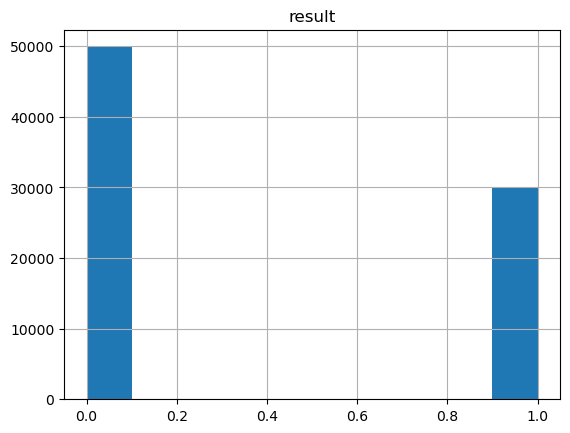

In [15]:
Phishing_url_df.hist(column="result")

In [17]:
Phishing_url_df['result'].value_counts().describe()

count        2.0000
mean     39870.5000
std      14118.8011
min      29887.0000
25%      34878.7500
50%      39870.5000
75%      44862.2500
max      49854.0000
Name: result, dtype: float64

C:\Users\msara\AppData\Local\Temp\ipykernel_7936\1241788986.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Phishing_url_df['result'])


<AxesSubplot:xlabel='result', ylabel='Density'>

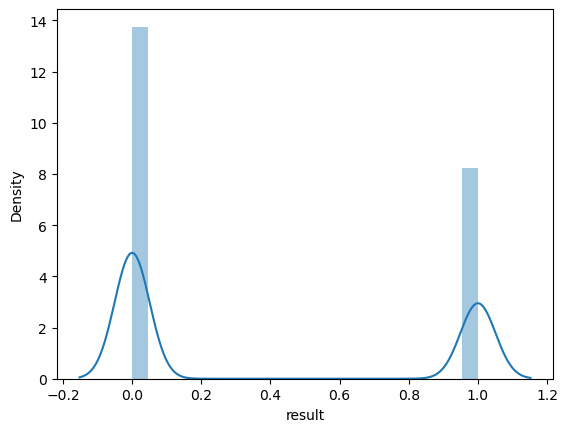

In [18]:
#Phishing_url_df.hist(column="result")
sns.distplot(Phishing_url_df['result'])

In [14]:
from fitter import Fitter
f = Fitter('phishing_dataset.csv')
f.fit()

TypeError: cannot perform reduce with flexible type

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,3125.945720,495.262689,-258250.988400,inf,0.610292,0.0
erlang,3467.089910,369.025674,-249991.516752,inf,0.625199,0.0
gamma,3906.426972,278.487071,-240477.814305,inf,0.625199,0.0
burr12,3959.214466,361.243846,-239396.204181,inf,0.625199,0.0
betaprime,3984.774685,487.551996,-238883.060365,inf,0.623092,0.0


C:\Users\msara\anaconda3.0\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


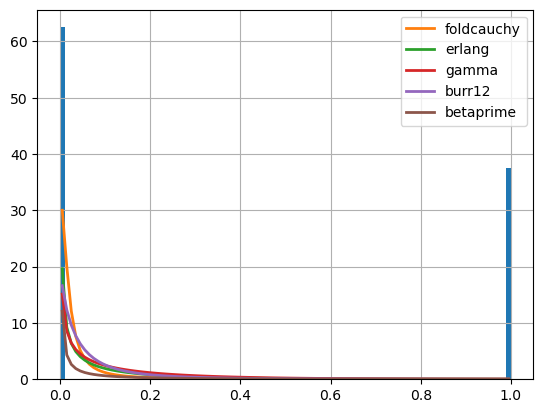

In [13]:
f.summary()